<a href="https://colab.research.google.com/github/SoraBioDataSci/KutaPortfolio/blob/main/Project_Yearly_Expense_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!head /content/Monzo Data Export - CSV (Wednesday, October 18th, 2023).csv

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `head /content/Monzo Data Export - CSV (Wednesday, October 18th, 2023).csv'


In [3]:
data = pd.read_csv('/content/Monzo Data Export - CSV (Wednesday, October 18th, 2023).csv')

In [4]:
data.head()

,Transaction ID,Date,Time,Type,Name,Emoji,Category,Amount,Currency,Local amount,Local currency,Notes and #tags,Address,Receipt,Description,Category split,Money Out,Money In
0,tx_0000ATvOMUtvIPM5DXHlXV,24/03/2023,01:05:14,Bacs (Direct Credit),Cwealth Scholar Co,NaN,Income,3708.00,GBP,3708.00,GBP,PPY038203/1798,NaN,NaN,PPY038203/1798,NaN,NaN,3708.0
1,tx_0000ATyN0M4BwbBNjKOGm1,25/03/2023,11:34:09,Card payment,Munch,🍔,Eating out,-3.50,GBP,-3.50,GBP,NaN,NaN,NaN,SumUp *Munch Solihull GBR,NaN,-3.50,NaN
2,tx_0000ATyb8ujkK8QVm74oXh,25/03/2023,14:12:34,Card payment,Sainsbury’s,🍏,Groceries,-430.85,GBP,-430.85,GBP,NaN,1 CHAPEL LANE,NaN,SAINSBURY'S SELLY OAK BIRMINGHAM GBR,NaN,-430.85,NaN
3,tx_0000AU0SwoeSiCluzWepAf,26/03/2023,11:50:10,Card payment,ATM,💵,Finances,-250.00,GBP,-250.00,GBP,NaN,Tesco Bm Br R Exp,NaN,TESCO BM BR R EXP BIRMINGHAM GBR,NaN,-250.00,NaN
4,tx_0000AU0ddg9z9rSQ626Vv9,26/03/2023,13:49:58,Card payment,Munch,🍔,Eating out,-3.50,GBP,-3.50,GBP,NaN,NaN,NaN,SumUp *Munch Solihull GBR,NaN,-3.50,NaN


In [5]:
data.drop(['Transaction ID','Notes and #tags','Category split','Receipt'], axis=1, inplace=True)

In [6]:
data.head()

,Date,Time,Type,Name,Emoji,Category,Amount,Currency,Local amount,Local currency,Address,Description,Money Out,Money In
0,24/03/2023,01:05:14,Bacs (Direct Credit),Cwealth Scholar Co,NaN,Income,3708.00,GBP,3708.00,GBP,NaN,PPY038203/1798,NaN,3708.0
1,25/03/2023,11:34:09,Card payment,Munch,🍔,Eating out,-3.50,GBP,-3.50,GBP,NaN,SumUp *Munch Solihull GBR,-3.50,NaN
2,25/03/2023,14:12:34,Card payment,Sainsbury’s,🍏,Groceries,-430.85,GBP,-430.85,GBP,1 CHAPEL LANE,SAINSBURY'S SELLY OAK BIRMINGHAM GBR,-430.85,NaN
3,26/03/2023,11:50:10,Card payment,ATM,💵,Finances,-250.00,GBP,-250.00,GBP,Tesco Bm Br R Exp,TESCO BM BR R EXP BIRMINGHAM GBR,-250.00,NaN
4,26/03/2023,13:49:58,Card payment,Munch,🍔,Eating out,-3.50,GBP,-3.50,GBP,NaN,SumUp *Munch Solihull GBR,-3.50,NaN


In [7]:
data['Description']=data['Description'].str.lower()

In [8]:
data.head()

,Date,Time,Type,Name,Emoji,Category,Amount,Currency,Local amount,Local currency,Address,Description,Money Out,Money In
0,24/03/2023,01:05:14,Bacs (Direct Credit),Cwealth Scholar Co,NaN,Income,3708.00,GBP,3708.00,GBP,NaN,ppy038203/1798,NaN,3708.0
1,25/03/2023,11:34:09,Card payment,Munch,🍔,Eating out,-3.50,GBP,-3.50,GBP,NaN,sumup *munch solihull gbr,-3.50,NaN
2,25/03/2023,14:12:34,Card payment,Sainsbury’s,🍏,Groceries,-430.85,GBP,-430.85,GBP,1 CHAPEL LANE,sainsbury's selly oak birmingham gbr,-430.85,NaN
3,26/03/2023,11:50:10,Card payment,ATM,💵,Finances,-250.00,GBP,-250.00,GBP,Tesco Bm Br R Exp,tesco bm br r exp birmingham gbr,-250.00,NaN
4,26/03/2023,13:49:58,Card payment,Munch,🍔,Eating out,-3.50,GBP,-3.50,GBP,NaN,sumup *munch solihull gbr,-3.50,NaN


In [9]:
data=data.sort_values(by='Date',ascending=False)

In [10]:
data.head()

,Date,Time,Type,Name,Emoji,Category,Amount,Currency,Local amount,Local currency,Address,Description,Money Out,Money In
157,31/07/2023,11:16:30,Card payment,NX Bus,🚍,Transport,-2.00,GBP,-2.00,GBP,51 Bordesley Green,nx bus contactless birmingham gbr,-2.00,NaN
158,31/07/2023,13:10:08,Card payment,Uber,🚖,Transport,-5.91,GBP,-5.91,GBP,Aldgate Tower First Floor,uber * pending london gbr,-5.91,NaN
217,30/09/2023,16:11:34,Card payment,Trent Barton,🚌,Transport,-7.60,GBP,-7.60,GBP,United Kingdom,contactless.travel heanor gbr,-7.60,NaN
99,30/05/2023,11:28:58,Card payment,Asda,🍏,Groceries,-10.95,GBP,-10.95,GBP,Morris Square,asda store 4758 wolstanton gbr,-10.95,NaN
61,30/04/2023,13:45:31,Card payment,Uber,🚖,Transport,-5.95,GBP,-5.95,GBP,2 Leman Street,uber * pending london gbr,-5.95,NaN


In [11]:
data.shape

(245, 14)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 157 to 122
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            245 non-null    object 
 1   Time            245 non-null    object 
 2   Type            245 non-null    object 
 3   Name            244 non-null    object 
 4   Emoji           219 non-null    object 
 5   Category        245 non-null    object 
 6   Amount          245 non-null    float64
 7   Currency        245 non-null    object 
 8   Local amount    245 non-null    float64
 9   Local currency  245 non-null    object 
 10  Address         164 non-null    object 
 11  Description     245 non-null    object 
 12  Money Out       222 non-null    float64
 13  Money In        23 non-null     float64
dtypes: float64(4), object(10)
memory usage: 28.7+ KB


In [13]:
data.describe()

,Amount,Local amount,Money Out,Money In
count,245.000000,245.000000,222.000000,23.000000
mean,3.863837,2.645878,-41.013243,437.025217
std,313.657225,316.365115,115.204436,861.004790
min,-923.000000,-929.750000,-923.000000,2.220000
25%,-17.050000,-17.050000,-19.470000,5.955000
50%,-6.990000,-6.990000,-7.890000,8.980000
75%,-3.500000,-3.500000,-4.972500,409.000000
max,3708.000000,3708.000000,0.000000,3708.000000


In [14]:
data['Category'].describe()

count           245
unique           13
top       Transport
freq             96
Name: Category, dtype: object

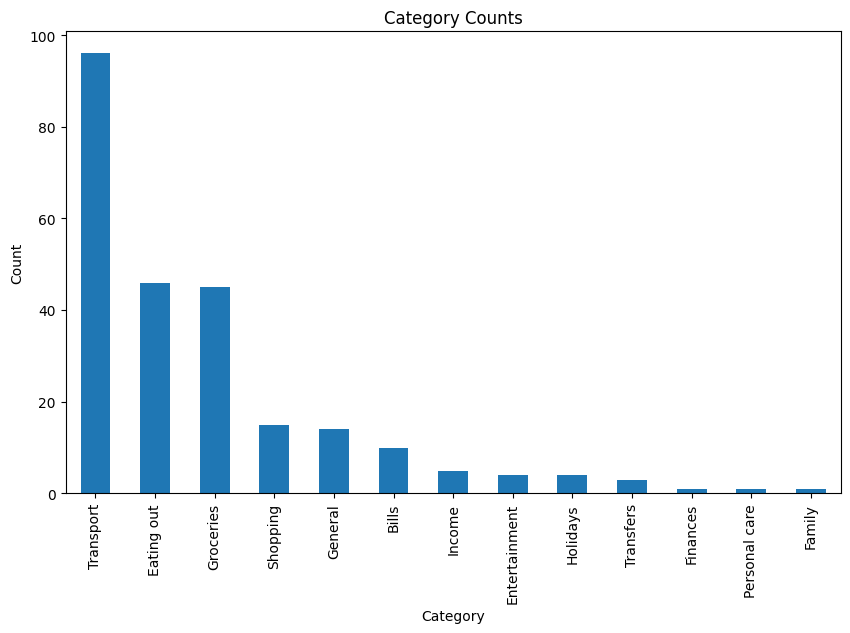

In [16]:
category_counts = data['Category'].value_counts()
category_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Category'>

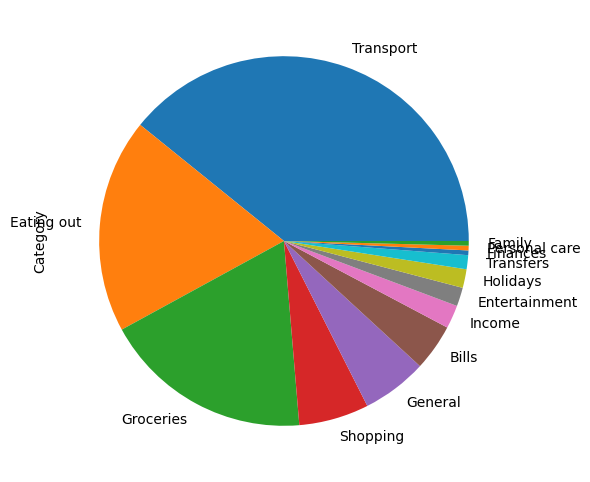

In [17]:
data['Category'].value_counts().plot(kind='pie', figsize=(6,6))


In [18]:
corr = data.corr()
corr

<ipython-input-18-df690e1cacaf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Amount,Local amount,Money Out,Money In
Amount,1.000000,0.999031,1.000000,1.0
Local amount,0.999031,1.000000,0.994147,1.0
Money Out,1.000000,0.994147,1.000000,NaN
Money In,1.000000,1.000000,NaN,1.0


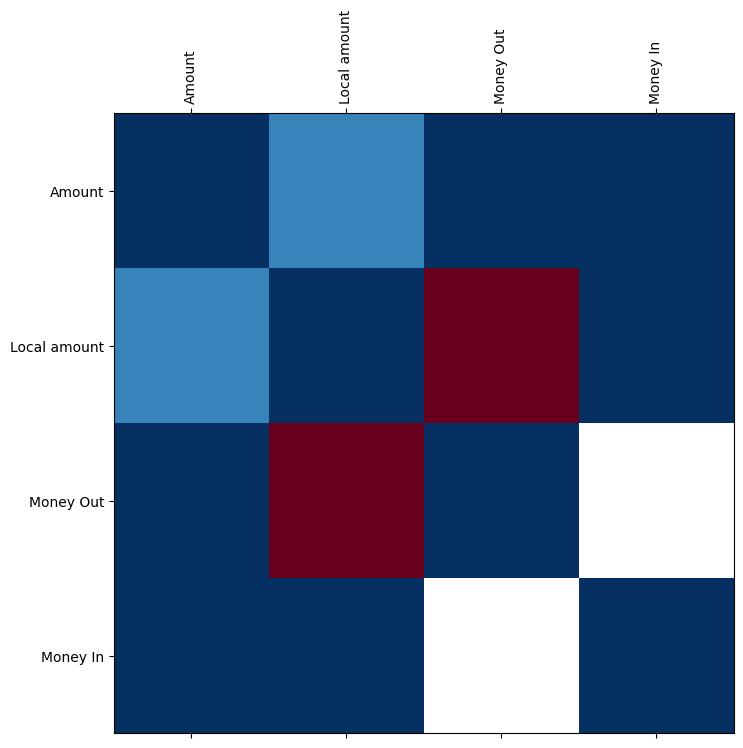

In [19]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
